### NLP practice 

Inspired and guided by https://medium.com/analytics-vidhya/natural-language-processing-with-python-cb3f83d5a393

In [10]:
import re

In [9]:
text = open('alice.txt','r').read()

In [15]:
def tokenise(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z^0-9]', ' ', str(text))
    return text.split()

In [17]:
tokens = tokenise(text)
print(tokens[:20])

['alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to']


In [18]:
from collections import Counter

In [19]:
def word_counter(tokens):
    word_count = Counter()
    word_count.update(tokens)
    return word_count

In [21]:
word_count = word_counter(tokens)
word_count.most_common(5)

[('the', 67), ('to', 53), ('she', 53), ('it', 52), ('and', 48)]

In [25]:
import matplotlib.pyplot as plt

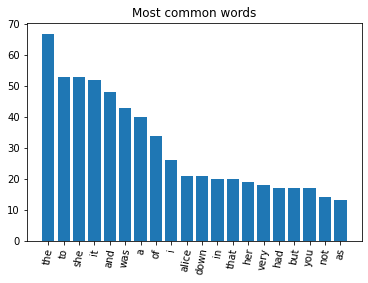

In [34]:
mc = dict(word_count.most_common(20))
x = list(mc.keys())
y = list(mc.values())
plt.bar(x,y)
plt.title('Most common words')
plt.xticks(rotation=80)
plt.show()

In [36]:
import spacy

ModuleNotFoundError: No module named 'spacy'

### Sentimental Analysis

https://thecleverprogrammer.com/2020/12/07/sentiment-analysis-with-python/

In [37]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
data = pd.read_csv('NLP_kaggle\Train.csv')

In [39]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [59]:
label0, label1 = data['label'].value_counts()
label0 = 100*label0/len(data)
label1 = 100*label1/len(data)

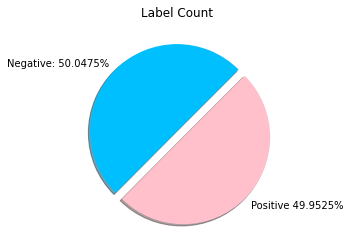

In [61]:
plt.figure().set_facecolor('white')
plt.pie(data['label'].value_counts(), labels=[f'Negative: {label0}%', f'Positive {label1}%'], colors=['deepskyblue', 'pink'], startangle=45, explode=(0,0.1), shadow=True)
plt.title('Label Count')
plt.show()

In [62]:
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   

In [65]:
text = data['text']
clean_text = []
for i in range(len(text)):
    clean_text.append(preprocessor(text[i]))
data['text'] = clean_text

In [66]:
data.head()

,text,label
0,i grew up b 1965 watching and loving the thund...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


In [70]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GMN19\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [87]:
stop = stopwords.words('english')
stop.append('movie')
stop.append('film')

In [84]:
def remove_stopwords(tokens):
    cleaned_tokens = []
    for token in tokens:
        if token not in stop:
            cleaned_tokens.append(token)
    return cleaned_tokens

In [73]:
positivedata = (data[data['label'] == 1])['text']
negativedata = (data[data['label'] == 0])['text']

In [90]:
positivetokens = tokenise(' '.join(positivedata))
positivetokens = remove_stopwords(positivetokens)
positive_wc = word_counter(positivetokens)
negativetokens = tokenise(' '.join(negativedata))
negativetokens = remove_stopwords(negativetokens)
negative_wc = word_counter(negativetokens)

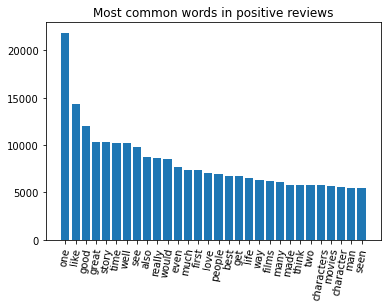

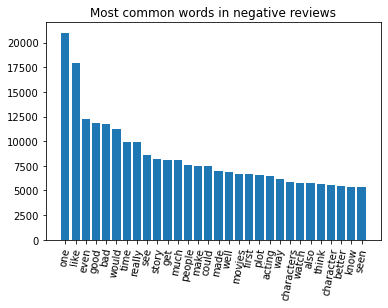

In [97]:
z=30
plt.bar(dict(positive_wc.most_common(z)).keys(),dict(positive_wc.most_common(z)).values())
plt.title('Most common words in positive reviews')
plt.xticks(rotation=80)
plt.show()
plt.bar(dict(negative_wc.most_common(z)).keys(),dict(negative_wc.most_common(z)).values())
plt.title('Most common words in negative reviews')
plt.xticks(rotation=80)
plt.show()

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [100]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [101]:
tfidf = TfidfVectorizer(strip_accents=None, lowercase=False, preprocessor=None, tokenizer=tokenizer_porter, use_idf=True, norm=12, smooth_idf=True)

In [106]:
y=data.label.values
x=tfidf.fit_transform(data.text)

ValueError: '12' is not a supported norm

In [102]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123, test_size=0.5, shuffle=False)

In [ ]:
y_pred = LogisticRegressionCV(cv=6, scoring='accuracy', random_state=123, n_jobs=1, verbose=3, max_iter=500).fit(x_train,y_train).predict(x_test)

ValueError: could not convert string to float: 'i grew up b 1965 watching and loving the thunderbirds all my mates at school watched we played thunderbirds before school during lunch and after school we all wanted to be virgil or scott no one wanted to be alan counting down from 5 became an art form i took my children to see the movie hoping they would get a glimpse of what i loved as a child how bitterly disappointing the only high point was the snappy theme tune not that it could compare with the original score of the thunderbirds thankfully early saturday mornings one television channel still plays reruns of the series gerry anderson and his wife created jonatha frakes should hand in his directors chair his version was completely hopeless a waste of film utter rubbish a cgi remake may be acceptable but replacing marionettes with homo sapiens subsp sapiens was a huge error of judgment '